### Importing the required libraries

In [88]:
# import all the required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from scipy.stats import zscore
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.model_selection import GridSearchCV
import datetime
import warnings
warnings.filterwarnings('ignore')

### Data Exploration

In [89]:
# load the data from the csv file into the pandas dataframe
df = pd.read_csv('nyc_taxi_trip_duration Dataset.csv')

In [90]:
# check the top 5 rows of the dataset
df.head()

id  vendor_id      pickup_datetime     dropoff_datetime  \
0  id1080784          2  2016-02-29 16:40:21  2016-02-29 16:47:01   
1  id0889885          1  2016-03-11 23:35:37  2016-03-11 23:53:57   
2  id0857912          2  2016-02-21 17:59:33  2016-02-21 18:26:48   
3  id3744273          2  2016-01-05 09:44:31  2016-01-05 10:03:32   
4  id0232939          1  2016-02-17 06:42:23  2016-02-17 06:56:31   

   passenger_count  pickup_longitude  pickup_latitude  dropoff_longitude  \
0                1        -73.953918        40.778873         -73.963875   
1                2        -73.988312        40.731743         -73.994751   
2                2        -73.997314        40.721458         -73.948029   
3                6        -73.961670        40.759720         -73.956779   
4                1        -74.017120        40.708469         -73.988182   

   dropoff_latitude store_and_fwd_flag  trip_duration  
0         40.771164                  N            400  
1         40.694931                  N           1100  
2         40.774918                  N           1635  
3         40.780628                  N           1141  
4         40.740631                  N            848

In [91]:
# check the last 5 rows of the dataset
df.tail()

id  vendor_id      pickup_datetime     dropoff_datetime  \
729317  id3905982          2  2016-05-21 13:29:38  2016-05-21 13:34:34   
729318  id0102861          1  2016-02-22 00:43:11  2016-02-22 00:48:26   
729319  id0439699          1  2016-04-15 18:56:48  2016-04-15 19:08:01   
729320  id2078912          1  2016-06-19 09:50:47  2016-06-19 09:58:14   
729321  id1053441          2  2016-01-01 17:24:16  2016-01-01 17:44:40   

        passenger_count  pickup_longitude  pickup_latitude  dropoff_longitude  \
729317                2        -73.965919        40.789780         -73.952637   
729318                1        -73.996666        40.737434         -74.001320   
729319                1        -73.997849        40.761696         -74.001488   
729320                1        -74.006706        40.708244         -74.013550   
729321                4        -74.003342        40.743839         -73.945847   

        dropoff_latitude store_and_fwd_flag  trip_duration  
729317         40.789181                  N            296  
729318         40.731911                  N            315  
729319         40.741207                  N            673  
729320         40.713814                  N            447  
729321         40.712841                  N           1224

In [92]:
# check the shape of the dataset
df.shape

(729322, 11)

In [93]:
# check the datatype of the columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 729322 entries, 0 to 729321
Data columns (total 11 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   id                  729322 non-null  object 
 1   vendor_id           729322 non-null  int64  
 2   pickup_datetime     729322 non-null  object 
 3   dropoff_datetime    729322 non-null  object 
 4   passenger_count     729322 non-null  int64  
 5   pickup_longitude    729322 non-null  float64
 6   pickup_latitude     729322 non-null  float64
 7   dropoff_longitude   729322 non-null  float64
 8   dropoff_latitude    729322 non-null  float64
 9   store_and_fwd_flag  729322 non-null  object 
 10  trip_duration       729322 non-null  int64  
dtypes: float64(4), int64(3), object(4)
memory usage: 61.2+ MB


In [94]:
# check the missing values in the data
df.isna().sum()

id                    0
vendor_id             0
pickup_datetime       0
dropoff_datetime      0
passenger_count       0
pickup_longitude      0
pickup_latitude       0
dropoff_longitude     0
dropoff_latitude      0
store_and_fwd_flag    0
trip_duration         0
dtype: int64

In [95]:
# check the duplicated rows in the data
df.duplicated().sum()

0

In [96]:
# checking the basic statistical summary of the data
df.describe().T

count        mean          std         min         25%  \
vendor_id          729322.0    1.535403     0.498745    1.000000    1.000000   
passenger_count    729322.0    1.662055     1.312446    0.000000    1.000000   
pickup_longitude   729322.0  -73.973513     0.069754 -121.933342  -73.991859   
pickup_latitude    729322.0   40.750919     0.033594   34.712234   40.737335   
dropoff_longitude  729322.0  -73.973422     0.069588 -121.933304  -73.991318   
dropoff_latitude   729322.0   40.751775     0.036037   32.181141   40.735931   
trip_duration      729322.0  952.229133  3864.626197    1.000000  397.000000   

                          50%          75%           max  
vendor_id            2.000000     2.000000  2.000000e+00  
passenger_count      1.000000     2.000000  9.000000e+00  
pickup_longitude   -73.981758   -73.967361 -6.589738e+01  
pickup_latitude     40.754070    40.768314  5.188108e+01  
dropoff_longitude  -73.979759   -73.963036 -6.589738e+01  
dropoff_latitude    40.754509    40.769741  4.392103e+01  
trip_duration      663.000000  1075.000000  1.939736e+06

- We can see that minimum count for passengers is 0 it means that data is ambigous so we need to remove those rows that are having passenger count of 0

In [97]:
df = df[df['passenger_count']!=0]

### Data Preprocessing

In [98]:
# changing the type of pickup_datetime and dropoff_datetime columns to datatime type
df['pickup_datetime']=pd.to_datetime(df['pickup_datetime'])
df['dropoff_datetime']=pd.to_datetime(df['dropoff_datetime'])

In [99]:
df.head()

id  vendor_id     pickup_datetime    dropoff_datetime  \
0  id1080784          2 2016-02-29 16:40:21 2016-02-29 16:47:01   
1  id0889885          1 2016-03-11 23:35:37 2016-03-11 23:53:57   
2  id0857912          2 2016-02-21 17:59:33 2016-02-21 18:26:48   
3  id3744273          2 2016-01-05 09:44:31 2016-01-05 10:03:32   
4  id0232939          1 2016-02-17 06:42:23 2016-02-17 06:56:31   

   passenger_count  pickup_longitude  pickup_latitude  dropoff_longitude  \
0                1        -73.953918        40.778873         -73.963875   
1                2        -73.988312        40.731743         -73.994751   
2                2        -73.997314        40.721458         -73.948029   
3                6        -73.961670        40.759720         -73.956779   
4                1        -74.017120        40.708469         -73.988182   

   dropoff_latitude store_and_fwd_flag  trip_duration  
0         40.771164                  N            400  
1         40.694931                  N           1100  
2         40.774918                  N           1635  
3         40.780628                  N           1141  
4         40.740631                  N            848

### Feature Engineering

In [100]:
# calculating the pickup_day and dropoff_day columns from pickup_datetime and dropoff_datetime columns
df['pickup_day']=df['pickup_datetime'].dt.day_name()
df['dropoff_day']=df['dropoff_datetime'].dt.day_name()

In [101]:
df.head()

id  vendor_id     pickup_datetime    dropoff_datetime  \
0  id1080784          2 2016-02-29 16:40:21 2016-02-29 16:47:01   
1  id0889885          1 2016-03-11 23:35:37 2016-03-11 23:53:57   
2  id0857912          2 2016-02-21 17:59:33 2016-02-21 18:26:48   
3  id3744273          2 2016-01-05 09:44:31 2016-01-05 10:03:32   
4  id0232939          1 2016-02-17 06:42:23 2016-02-17 06:56:31   

   passenger_count  pickup_longitude  pickup_latitude  dropoff_longitude  \
0                1        -73.953918        40.778873         -73.963875   
1                2        -73.988312        40.731743         -73.994751   
2                2        -73.997314        40.721458         -73.948029   
3                6        -73.961670        40.759720         -73.956779   
4                1        -74.017120        40.708469         -73.988182   

   dropoff_latitude store_and_fwd_flag  trip_duration pickup_day dropoff_day  
0         40.771164                  N            400     Monday      Monday  
1         40.694931                  N           1100     Friday      Friday  
2         40.774918                  N           1635     Sunday      Sunday  
3         40.780628                  N           1141    Tuesday     Tuesday  
4         40.740631                  N            848  Wednesday   Wednesday

In [102]:
# Define a list of tuples for time zones
time_zones = [
    (datetime.time(4, 0, 1), datetime.time(10, 0, 0), 'morning'),
    (datetime.time(10, 0, 1), datetime.time(16, 0, 0), 'midday'),
    (datetime.time(16, 0, 1), datetime.time(22, 0, 0), 'evening'),
    (datetime.time(22, 0, 1), datetime.time(23, 59, 59), 'late night'),
    (datetime.time(0, 0, 0), datetime.time(4, 0, 0), 'late night')
]

# Define a function to get the time zone based on the time of day
def get_time_zone(time):
    for start, end, zone in time_zones:
        if start <= time <= end:
            return zone

# Apply the function to the pickup and dropoff datetimes
df['pickup_timezone'] = df['pickup_datetime'].apply(lambda x: get_time_zone(datetime.datetime.strptime(str(x), "%Y-%m-%d %H:%M:%S").time()))
df['dropoff_timezone'] = df['dropoff_datetime'].apply(lambda x: get_time_zone(datetime.datetime.strptime(str(x), "%Y-%m-%d %H:%M:%S").time()))

In [103]:
bins=np.array([0,1800,3600,5400,7200,90000])
df['duration_time']=pd.cut(df.trip_duration,bins,labels=["< 5", "5-10", "10-15","15-20",">20"])

In [104]:
# Define a function to calculate the distance between pickup and dropoff coordinates using Haversine formula.
from math import radians, cos, sin, asin, sqrt

def haversine(pickup, dropoff):
    # Earth's radius in kilometers
    R = 6371

    # Convert pickup and dropoff coordinates from degrees to radians
    pickup_lat, pickup_lon = map(radians, pickup)
    drop_lat, drop_lon = map(radians, dropoff)

    # Calculate the difference between the latitude and longitude coordinates
    lat_diff = drop_lat - pickup_lat
    lon_diff = drop_lon - pickup_lon

    # Calculate the distance using the Haversine formula
    a = sin(lat_diff/2)**2 + cos(pickup_lat) * cos(drop_lat) * sin(lon_diff/2)**2
    c = 2 * asin(sqrt(a))
    distance = R * c

    return distance

def calc_distance(df):
    pickup = (df['pickup_latitude'], df['pickup_longitude'])
    dropoff = (df['dropoff_latitude'], df['dropoff_longitude'])
    return haversine(pickup, dropoff)


# Calculating distance column
df["distance"] = df.apply(lambda x: calc_distance(x),axis=1)

In [105]:
# converting the datatype of datetime column to feature new columns
df["pickup_datetime"] = pd.to_datetime(df["pickup_datetime"], format="%Y-%m-%d %H:%M:%S")

In [106]:
df['Day']=df['pickup_datetime'].dt.day_name()

In [107]:
# calculating the new columns 
df['year'] = df['pickup_datetime'].dt.year
df['month'] = df['pickup_datetime'].dt.month
df['day_num'] = df['pickup_datetime'].dt.day
df['hour'] = df['pickup_datetime'].dt.hour
df['minute'] = df['pickup_datetime'].dt.minute

In [108]:
# Converting trip duration into hours
df['trip_duration_hour'] = df['trip_duration']/3600
# Taking log of our distance for normalisation of data.
df['log_distance']=np.log(df.distance)
# Taking log of our trip duration as well to normalize it's data too.
df['log_trip_duration']=np.log(df.trip_duration_hour)

### Removing Outliers

In [109]:
def remove_outliers_iqr(df, column_name):
    # Get the IQR range
    q1 = df[column_name].quantile(0.25)
    q3 = df[column_name].quantile(0.75)
    iqr = q3 - q1

    # Define the lower and upper bounds for outliers
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr

    # Remove the outliers from the DataFrame
    filtered_df = df[(df[column_name] >= lower_bound) & (df[column_name] <= upper_bound)]

    return filtered_df

In [110]:
df = remove_outliers_iqr(df, 'distance')
df = remove_outliers_iqr(df, 'trip_duration')
df = remove_outliers_iqr(df, 'passenger_count')

In [111]:
df.head()

id  vendor_id     pickup_datetime    dropoff_datetime  \
0  id1080784          2 2016-02-29 16:40:21 2016-02-29 16:47:01   
1  id0889885          1 2016-03-11 23:35:37 2016-03-11 23:53:57   
2  id0857912          2 2016-02-21 17:59:33 2016-02-21 18:26:48   
4  id0232939          1 2016-02-17 06:42:23 2016-02-17 06:56:31   
5  id1918069          2 2016-02-14 18:31:42 2016-02-14 18:55:57   

   passenger_count  pickup_longitude  pickup_latitude  dropoff_longitude  \
0                1        -73.953918        40.778873         -73.963875   
1                2        -73.988312        40.731743         -73.994751   
2                2        -73.997314        40.721458         -73.948029   
4                1        -74.017120        40.708469         -73.988182   
5                2        -73.993614        40.751884         -73.995422   

   dropoff_latitude store_and_fwd_flag  ...  distance        Day  year month  \
0         40.771164                  N  ...  1.199073     Monday  2016     2   
1         40.694931                  N  ...  4.129111     Friday  2016     3   
2         40.774918                  N  ...  7.250753     Sunday  2016     2   
4         40.740631                  N  ...  4.328534  Wednesday  2016     2   
5         40.723862                  N  ...  3.119711     Sunday  2016     2   

  day_num hour  minute trip_duration_hour  log_distance  log_trip_duration  
0      29   16      40           0.111111      0.181548          -2.197225  
1      11   23      35           0.305556      1.418062          -1.185624  
2      21   17      59           0.454167      1.981105          -0.789291  
4      17    6      42           0.235556      1.465229          -1.445808  
5      14   18      31           0.404167      1.137740          -0.905928  

[5 rows x 26 columns]

### Encoding Categorical columns

In [112]:
# using the one hot encoder on the categorical columns on the data
df= pd.get_dummies(df, columns=["store_and_fwd_flag", "Day"], prefix=["store_and_fwd_flag",'Day'])

In [113]:
# selecting the relevant features
cols_to_use =['vendor_id','passenger_count','pickup_longitude','pickup_latitude','dropoff_longitude','dropoff_latitude','distance','month','hour','minute',
          'store_and_fwd_flag_N','store_and_fwd_flag_Y','Day_Friday','Day_Monday','Day_Saturday','Day_Sunday','Day_Thursday','Day_Tuesday','Day_Wednesday', 'trip_duration_hour']

In [114]:
new_df = df[cols_to_use]

In [115]:
new_df.shape

(571694, 20)

In [116]:
# splitting the dataset into the training and test dataset
X = new_df.drop('trip_duration_hour', axis=1)
features_names = X.columns
X = X.values[:100000]
y = new_df['trip_duration_hour'].values[:100000]

### Normalizing the data

In [117]:
# using the standard scalar to normalize the data
ss = StandardScaler()
X_scaled = ss.fit_transform(X)

In [118]:
# splitting the dataset into the training and test dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Machine learning

### 1. Choosing an evaluation metric
- We'll use Mean Squared Error (MSE) as our evaluation metric for all models.
- MSE is a commonly used metric for regression problems.
- We'll also compute the Root Mean Squared Error (RMSE) to help interpret the error.


### 2. Building a benchmark model
- We'll use a simple linear regression model as our benchmark model.

In [119]:
lr = LinearRegression()
lr.fit(X_train, y_train)
train_preds_lr = lr.predict(X_train)
test_preds_lr = lr.predict(X_test)
mse_lr_train = mean_squared_error(y_train, train_preds_lr)
mse_lr_test = mean_squared_error(y_test, test_preds_lr)
rmse_lr_train = np.sqrt(mse_lr_train)
rmse_lr_test = np.sqrt(mse_lr_test)

### 3. Building a K-Nearest Neighbors (KNN) model
- We'll use a KNN model with k=5 as our initial model.

In [120]:
knn = KNeighborsRegressor(n_neighbors=5)
knn.fit(X_train, y_train)
train_preds_knn = knn.predict(X_train)
test_preds_knn = knn.predict(X_test)
mse_knn_train = mean_squared_error(y_train, train_preds_knn)
mse_knn_test = mean_squared_error(y_test, test_preds_knn)
rmse_knn_train = np.sqrt(mse_knn_train)
rmse_knn_test = np.sqrt(mse_knn_test)

- Find the best value of K using GridSearchCV

In [121]:
param_grid = {'n_neighbors': [3, 5, 7, 9]}
grid_search = GridSearchCV(KNeighborsRegressor(), param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)
print(grid_search.best_params_)

{'n_neighbors': 9}


- Final Model with best values of n_neighbours

In [122]:
knn = KNeighborsRegressor(n_neighbors=9)
knn.fit(X_train, y_train)
train_preds_knn = knn.predict(X_train)
test_preds_knn = knn.predict(X_test)
mse_knn_train = mean_squared_error(y_train, train_preds_knn)
mse_knn_test = mean_squared_error(y_test, test_preds_knn)
rmse_knn_train = np.sqrt(mse_knn_train)
rmse_knn_test = np.sqrt(mse_knn_test)

### 4. Building a Linear Model with Regularization
- We'll use a Ridge regression model with alpha=1 as our regularized linear model.

In [123]:
ridge = Ridge(alpha=1)
ridge.fit(X_train, y_train)
train_preds_ridge = ridge.predict(X_train)
test_preds_ridge = ridge.predict(X_test)
mse_ridge_train = mean_squared_error(y_train, train_preds_ridge)
mse_ridge_test = mean_squared_error(y_test, test_preds_ridge)
rmse_ridge_train = np.sqrt(mse_ridge_train)
rmse_ridge_test = np.sqrt(mse_ridge_test)

In [124]:
# Interpret the variable coefficients of the Ridge regression model
ridge_coef = pd.DataFrame({'feature': features_names, 'coefficient': ridge.coef_})
ridge_coef = ridge_coef.sort_values(by='coefficient', ascending=False)
print(ridge_coef)

                 feature  coefficient
3        pickup_latitude     0.173926
6               distance     0.046153
16          Day_Thursday     0.010836
18         Day_Wednesday     0.010291
12            Day_Friday     0.008038
17           Day_Tuesday     0.007493
1        passenger_count     0.003511
7                  month     0.002405
8                   hour     0.000908
10  store_and_fwd_flag_N     0.000273
0              vendor_id     0.000142
9                 minute    -0.000024
11  store_and_fwd_flag_Y    -0.000273
14          Day_Saturday    -0.007372
13            Day_Monday    -0.008053
15            Day_Sunday    -0.021233
2       pickup_longitude    -0.141036
4      dropoff_longitude    -0.262080
5       dropoff_latitude    -0.265011


### 5. Building a Decision Tree Model
- We'll use a decision tree model with max_depth=10 as our decision tree model.

In [125]:
dt = DecisionTreeRegressor(max_depth=10)
dt.fit(X_train, y_train)
train_preds_dt = dt.predict(X_train)
test_preds_dt = dt.predict(X_test)
mse_dt_train = mean_squared_error(y_train, train_preds_dt)
mse_dt_test = mean_squared_error(y_test, test_preds_dt)
rmse_dt_train = np.sqrt(mse_dt_train)
rmse_dt_test = np.sqrt(mse_dt_test)

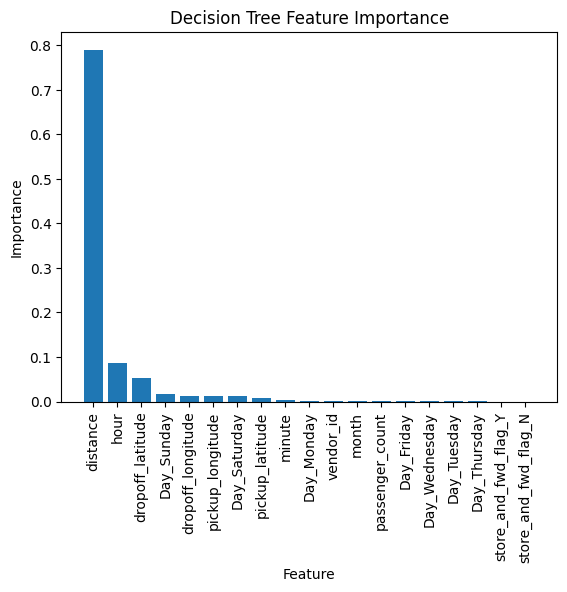

In [126]:
#Interpret the variable importance of the Decision Tree model
dt_feature_importance = pd.DataFrame({'feature': features_names, 'importance': dt.feature_importances_})
dt_feature_importance = dt_feature_importance.sort_values(by='importance', ascending=False)
# Create a bar plot of feature importances
plt.bar(dt_feature_importance['feature'], dt_feature_importance['importance'])
# Set the x-axis tick labels to be rotated vertically
plt.xticks(rotation=90)
# Add a title and labels to the plot
plt.title('Decision Tree Feature Importance')
plt.xlabel('Feature')
plt.ylabel('Importance')
# Show the plot
plt.show()

### 6. Plotting bar plots
- We'll create bar plots of the train and test scores of all the models we've built.

#### Train scores

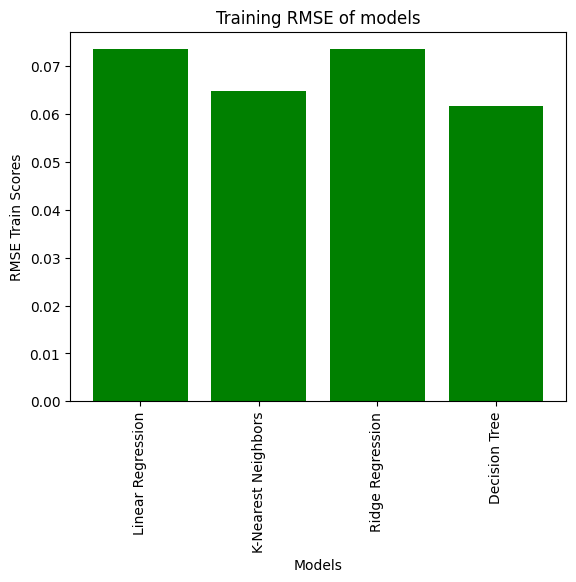

In [127]:
train_scores = [rmse_lr_train, rmse_knn_train, rmse_ridge_train, rmse_dt_train]
models = ['Linear Regression', 'K-Nearest Neighbors', 'Ridge Regression', 'Decision Tree']
x_pos = np.arange(len(models))
plt.bar(x_pos, train_scores, color='green')
plt.xlabel("Models")
plt.ylabel("RMSE Train Scores")
plt.xticks(x_pos, models, rotation=90)
plt.title('Training RMSE of models')
plt.show()

#### Test scores

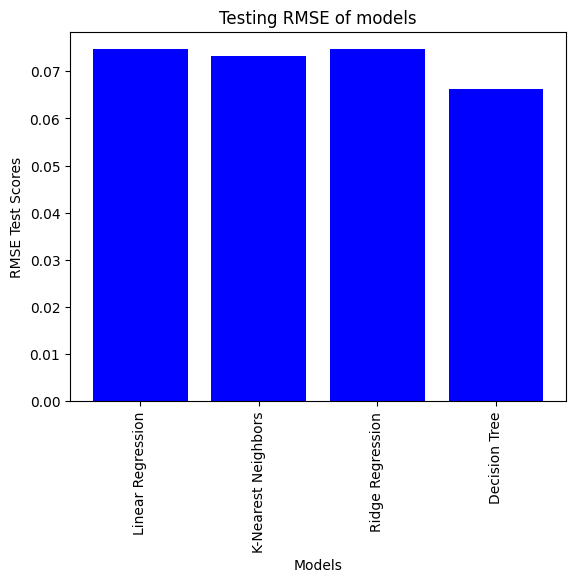

In [128]:
test_scores = [rmse_lr_test, rmse_knn_test, rmse_ridge_test, rmse_dt_test]
models = ['Linear Regression', 'K-Nearest Neighbors', 'Ridge Regression', 'Decision Tree']
x_pos = np.arange(len(models))
plt.bar(x_pos, test_scores, color='blue')
plt.xlabel("Models")
plt.ylabel("RMSE Test Scores")
plt.xticks(x_pos, models, rotation=90)
plt.title('Testing RMSE of models')
plt.show()